In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [2]:
las = lasio.read(r"C:\Users\HAFS\Desktop\Hafs Pyprograms\well log\Dharmatttan\LOGS\Jay 02.LAS")

In [3]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [4]:
las.well.Well.value

'Jay 02'

In [6]:
for item in las.curves: #checks each curve in the data
    print(item.mnemonic)

DEPT
GR_CED
NEUSS_CED
RESD_CED
RHOB_CED
PHIE
SW
VSH


In [7]:
well = las.df() #converts to pandas dataframe

In [8]:
well.head()

,GR_CED,NEUSS_CED,RESD_CED,RHOB_CED,PHIE,SW,VSH
DEPT,,,,,,,
6224.0,109.582703,0.3331,5.7472,2.2508,0.0526,1.0,0.7302
6224.5,115.981499,0.3360,5.5182,2.2673,0.0229,1.0,0.8830
6225.0,122.380302,0.3389,5.2892,2.2838,0.0000,1.0,1.0000
6225.5,122.970001,0.3417,5.0227,2.3108,0.0000,1.0,1.0000
6226.0,123.559601,0.3445,4.7562,2.3379,0.0000,1.0,1.0000


In [9]:
well.describe()

,GR_CED,NEUSS_CED,RESD_CED,RHOB_CED,PHIE,SW,VSH
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,84.746835,0.358286,17.528185,2.340627,0.140887,0.918870,0.467479
std,31.005373,0.077512,63.197222,0.125086,0.091418,0.189262,0.319232
min,27.615999,0.131200,1.058000,1.973600,0.000000,0.147900,0.009400
25%,53.806000,0.298900,1.860900,2.216300,0.068000,0.999900,0.126700
50%,97.362801,0.343500,3.995300,2.400300,0.130200,1.000000,0.515900
75%,108.939003,0.421800,9.580100,2.446000,0.208400,1.000000,0.716700
max,156.288895,0.613500,938.373779,2.543900,0.346300,1.000000,1.000000


<Axes: xlabel='DEPT'>

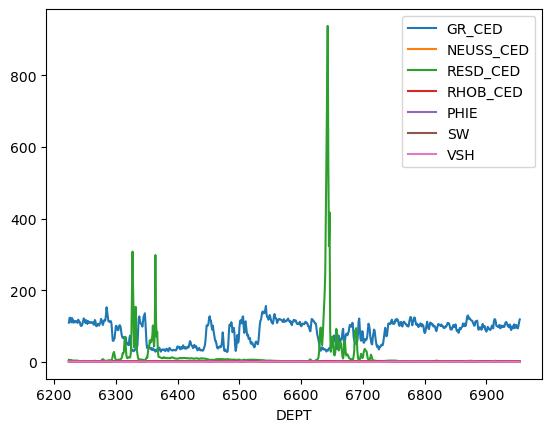

In [10]:
well.plot()

<Axes: ylabel='Frequency'>

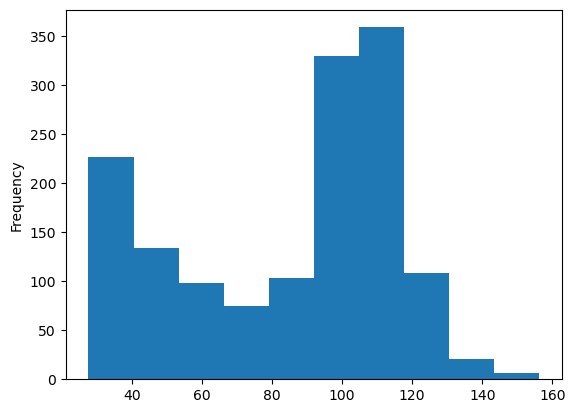

In [11]:
# using pandas to plot
well["GR_CED"].plot(kind = "hist")

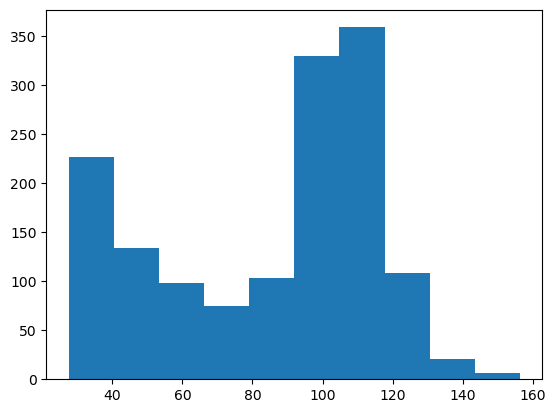

In [12]:
#using matplotlib
plt.hist(well["GR_CED"])
plt.show()

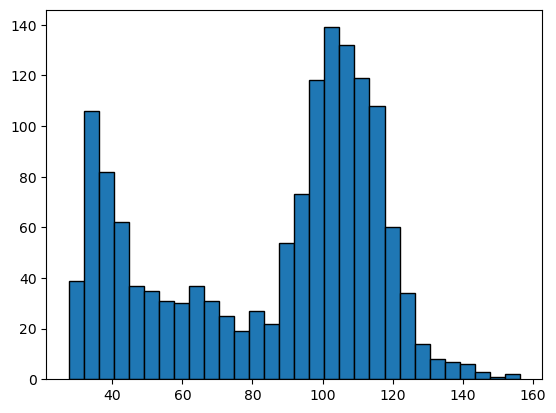

In [15]:
plt.hist(well["GR_CED"], bins = 30, edgecolor = "black")
plt.show()

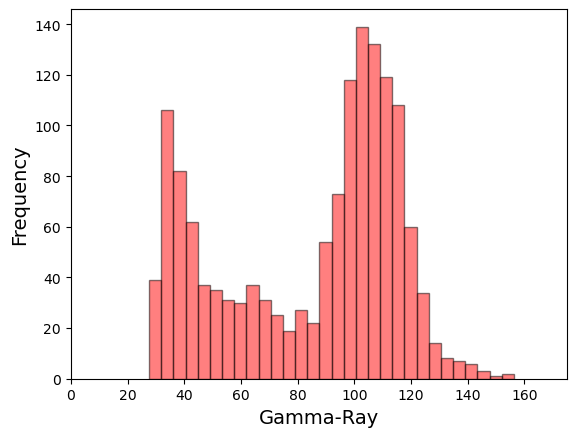

In [30]:
# alpha controls the transparency level of the histogram bars.

plt.hist(well["GR_CED"], bins = 30, color = "red", alpha = 0.5, edgecolor = "black")
plt.xlabel("Gamma-Ray", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.xlim(0,175)
plt.show()

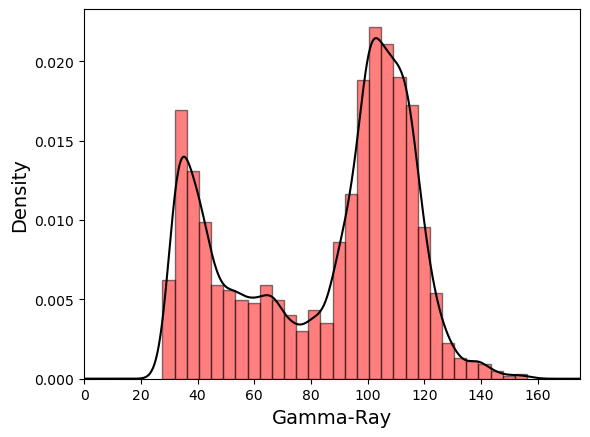

In [38]:
# KDE plot provides a smoothed curve that represents the data's density, overlaid on the same axes. 

well["GR_CED"].plot(kind = "hist", bins = 30, color = "red", alpha = 0.5, density = True, edgecolor = "black")
well["GR_CED"].plot(kind = "kde", bw_method= 0.1, color = "black") # bw_method controls the bandwidth.
plt.xlabel("Gamma-Ray", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.xlim(0,175)

plt.show()

In [42]:
mean = well["GR_CED"].mean()
p5 = well["GR_CED"].quantile(0.05)
p95 = well["GR_CED"].quantile(0.95)

print(f"Gamma-ray Mean: \t{mean:.2f}")
print(f"Gamma-ray 5th percentile: \t{p5:.2f}")
print(f"Gamma-ray 95th percentile: \t{p95:.2f}")
    

Gamma-ray Mean: 	84.75
Gamma-ray 5th percentile: 	33.15
Gamma-ray 95th percentile: 	122.11


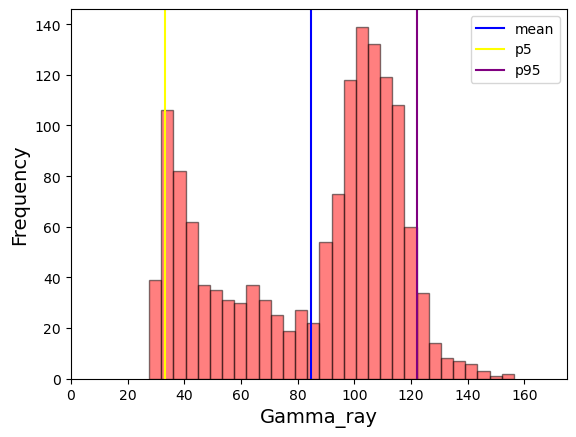

In [49]:
# to indicate on the chart the position of mean and each percentile

plt.hist(well["GR_CED"], bins = 30, color = "red", alpha = 0.5, edgecolor= 'black')
plt.xlabel("Gamma_ray", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.xlim(0,175)

plt.axvline(mean, color = "blue", label = "mean")
plt.axvline(p5, color = "yellow", label = "p5")
plt.axvline(p95, color = "purple", label = "p95")

plt.legend()
plt.show()